In [2]:
import os,glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
#Load and visualize data
data_input_path = '/Users/MYPC/desktop/cnn/New folder/Assignment/data/volumes/'
image_input_path= os.path.join(data_input_path,'img/')                             
mask_input_output = os.path.join(data_input_path,'mask/')

dataOutput_Path  = '/Users/MYPC/desktop/cnn/New folder/Assignment/data/slices/'
imageSlice_Output= os.path.join(dataOutput_Path,'img/')                             
maskSlice_Output = os.path.join(dataOutput_Path,'mask/')

HOUNSFIELD_MIN = 0
HOUNSFIELD_MAX = 1210
HOUNSFIELD_RANGE = HOUNSFIELD_MAX - HOUNSFIELD_MIN

#For Slicing and saving
SLICE_X = True
SLICE_Y = True
SLICE_Z = False

SLICE_DECIMATE_IDENTIFIER = 3


In [4]:
imgpath = os.path.join(image_input_path, 'sub-A00028185_ses-NFB3_T1w.nii.gz')
img = nib.load(imgpath).get_fdata()
np.min(img),np.max(img),img.shape,type(img)

(0.0, 1205.0, (256, 256, 192), numpy.ndarray)

In [5]:
maskpath = os.path.join(mask_input_output, 'sub-A00028185_ses-NFB3_T1w_brainmask.nii.gz')
mask = nib.load(maskpath).get_fdata()
np.min(mask),np.max(mask),mask.shape,type(mask)

(0.0, 1.0, (256, 256, 192), numpy.ndarray)

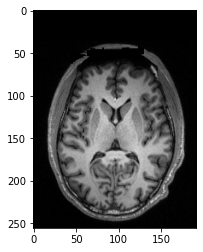

In [25]:
img_slice = img[:,92,:]
plt.imshow(img_slice, cmap='gray')
plt.show()

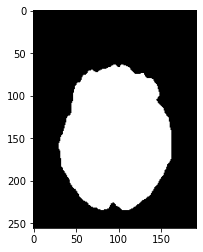

In [26]:
img_slice = mask[:,98,:]
plt.imshow(img_slice, cmap='gray')
plt.show()

In [31]:
# Normalize image
def normalizeImageIntensityRange(img):
    img[img < HOUNSFIELD_MIN] = HOUNSFIELD_MIN
    img[img > HOUNSFIELD_MAX] = HOUNSFIELD_MAX
    return (img - HOUNSFIELD_MIN) / HOUNSFIELD_RANGE

nImg = normalizeImageIntensityRange(img)
np.min(nImg), np.max(nImg), nImg.shape, type(nImg)


(0.0, 0.9958677685950413, (256, 256, 192), numpy.ndarray)

In [32]:
# Read image or mask volume
def readImageVolume(imgpath, normalize=False):
    img = nib.load(imgpath).get_fdata()
    if normalize:
        return normalizeImageIntensityRange(img)
    else:
        return img
    
readImageVolume(imgpath, normalize=True)
readImageVolume(maskpath, normalize=False)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [33]:
# Save volume slice to file
def saveSlice(img, fname, path):
    img = np.uint8(img * 255)
    fout = os.path.join(path, f'{fname}.png')
    cv2.imwrite(fout, img)
    print(f'[+] Slice saved: {fout}', end='\r')

In [34]:
#saving a image and mask for testing .....
saveSlice(nImg[:,:,img.shape[2]//2], 'test', imageSlice_Output)
saveSlice(mask[:,:,img.shape[2]//2], 'test', maskSlice_Output)

In [35]:
# Slice image in all directions and save
def sliceAndSaveVolumeImage(vol, fname, path):
    (dimx, dimy, dimz) = vol.shape
    print(dimx, dimy, dimz)
    cnt = 0
    if SLICE_X:
        cnt += dimx
        print('Slicing X: ')
        for i in range(dimx):
            saveSlice(vol[i,:,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_x', path)
            
    if SLICE_Y:
        cnt += dimy
        print('Slicing Y: ')
        for i in range(dimy):
            saveSlice(vol[:,i,:], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_y', path)
            
    if SLICE_Z:
        cnt += dimz
        print('Slicing Z: ')
        for i in range(dimz):
            saveSlice(vol[:,:,i], fname+f'-slice{str(i).zfill(SLICE_DECIMATE_IDENTIFIER)}_z', path)
    return cnt

In [36]:
# Read and process image volumes
for index, filename in enumerate(sorted(glob.iglob(image_input_path+'*.nii.gz'))):
    img = readImageVolume(filename, True)#true for normalization
    print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
    numOfSlices = sliceAndSaveVolumeImage(img, 'brain'+str(index), imageSlice_Output)
    print(f'\n{filename}, {numOfSlices} slices created \n')

/Users/MYPC/desktop/cnn/New folder/Assignment/data/volumes/img\sub-A00028185_ses-NFB3_T1w.nii.gz (256, 256, 192) 704 0.0 0.9958677685950413
256 256 192
Slicing X: 
Slicing Y: aved: /Users/MYPC/desktop/cnn/New folder/Assignment/data/slices/img/brain0-slice255_x.png
[+] Slice saved: /Users/MYPC/desktop/cnn/New folder/Assignment/data/slices/img/brain0-slice255_y.png
/Users/MYPC/desktop/cnn/New folder/Assignment/data/volumes/img\sub-A00028185_ses-NFB3_T1w.nii.gz, 512 slices created 

/Users/MYPC/desktop/cnn/New folder/Assignment/data/volumes/img\sub-A00028352_ses-NFB3_T1w.nii.gz (256, 256, 192) 704 0.0 1.0
256 256 192
Slicing X: 
Slicing Y: aved: /Users/MYPC/desktop/cnn/New folder/Assignment/data/slices/img/brain1-slice255_x.png
[+] Slice saved: /Users/MYPC/desktop/cnn/New folder/Assignment/data/slices/img/brain1-slice255_y.png
/Users/MYPC/desktop/cnn/New folder/Assignment/data/volumes/img\sub-A00028352_ses-NFB3_T1w.nii.gz, 512 slices created 

/Users/MYPC/desktop/cnn/New folder/Assignment

In [37]:
# Read and process image mask volumes
for index, filename in enumerate(sorted(glob.iglob(mask_input_output+'*.nii.gz'))):
    img = readImageVolume(filename, False)
    print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
    numOfSlices = sliceAndSaveVolumeImage(img, 'brain'+str(index), maskSlice_Output)
    print(f'\n{filename}, {numOfSlices} slices created \n')

/Users/MYPC/desktop/cnn/New folder/Assignment/data/volumes/mask\sub-A00028185_ses-NFB3_T1w_brainmask.nii.gz (256, 256, 192) 704 0.0 1.0
256 256 192
Slicing X: 
Slicing Y: aved: /Users/MYPC/desktop/cnn/New folder/Assignment/data/slices/mask/brain0-slice255_x.png
[+] Slice saved: /Users/MYPC/desktop/cnn/New folder/Assignment/data/slices/mask/brain0-slice255_y.png
/Users/MYPC/desktop/cnn/New folder/Assignment/data/volumes/mask\sub-A00028185_ses-NFB3_T1w_brainmask.nii.gz, 512 slices created 

/Users/MYPC/desktop/cnn/New folder/Assignment/data/volumes/mask\sub-A00028352_ses-NFB3_T1w_brainmask.nii.gz (256, 256, 192) 704 0.0 1.0
256 256 192
Slicing X: 
Slicing Y: aved: /Users/MYPC/desktop/cnn/New folder/Assignment/data/slices/mask/brain1-slice255_x.png
[+] Slice saved: /Users/MYPC/desktop/cnn/New folder/Assignment/data/slices/mask/brain1-slice255_y.png
/Users/MYPC/desktop/cnn/New folder/Assignment/data/volumes/mask\sub-A00028352_ses-NFB3_T1w_brainmask.nii.gz, 512 slices created 

/Users/MYPC/

In [38]:
#reading the test image(out of NFBS dataset)
imgPath = ( r'C:\Users\MYPC\Desktop\CNN\New folder\T1w_MRI_test_data\T1Img\sub-01\T1w.nii.gz')
img_test = nib.load(imgPath).get_fdata()
np.min(img_test),np.max(img_test),img_test.shape,type(img_test)

(0.0, 1201.0, (160, 256, 256), numpy.ndarray)

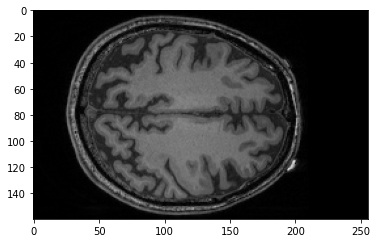

In [39]:
# img_test_slice = img_test[:,:,160]
# plt.imshow(img_test_slice, cmap='gray')
# plt.show()